In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model

In [ ]:
df = pd.read_csv('/content/train.csv')
df = df.dropna()
df.head()

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984


In [ ]:
X = df.values[:, 0]
Y = df.values[:, 1].reshape(X.size, 1)
X = np.vstack((np.ones((X.size, )), X)).T


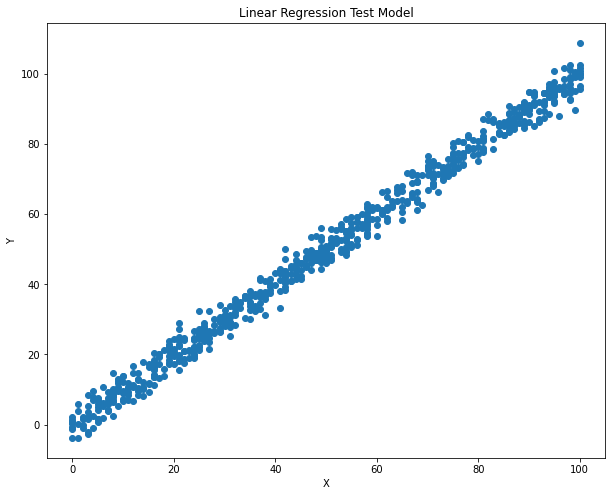

In [ ]:
fig = plt.figure()
fig.set_figheight(8)
fig.set_figwidth(10)
ax = plt.scatter(df.x,df.y)
ax = plt.xlabel('X')
ax = plt.ylabel('Y')
ax = plt.title('Linear Regression Test Model')

In [ ]:
learning_rate = 0.0001
n_iters = 1000
weights = None
bias = None

def fit(X, y):
  n_samples, n_features = X.shape
  weights = np.zeros(n_features)
  bias = 0
  for i in range(n_iters):
      y_predicted = np.dot(X, weights) + bias
      dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
      db = (1 / n_samples) * np.sum(y_predicted - y)
      weights = weights - learning_rate * dw
      bias = bias - learning_rate * db
  return weights,bias

def predict(X,weights,bias):
  y_approximated = np.dot(X,weights) + bias
  return y_approximated  

X = df.values[:, 0]
Y = df.values[:, 1]
X = np.reshape(X,(-1, 1))

print('weight :',weights[0])
print('bias :',bias)

weight : 0.9988705055011785
bias : 0.011937938999784082


In [ ]:
df_test = pd.read_csv('/content/test.csv')

for index , row in df_test.iterrows():
  predicted = predict(df_test.loc[index,'x'],weights,bias)[0]
  df_test.loc[index,'y_predicted'] = predicted
  
df_test.head()

,x,y,y_predicted
0,77,79.775152,76.924967
1,21,23.177279,20.988219
2,22,25.609262,21.987089
3,20,17.857388,19.989348
4,36,41.849864,35.971276


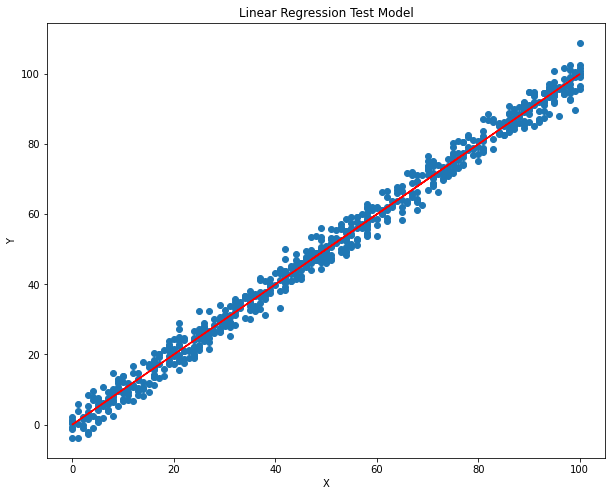

In [ ]:
fig = plt.figure()
fig.set_figheight(8)
fig.set_figwidth(10)
ax = plt.scatter(df.x,df.y)
ax = plt.plot(df_test.x,df_test.y_predicted,color = 'red')
ax = plt.xlabel('X')
ax = plt.ylabel('Y')
ax = plt.title('Linear Regression Test Model')